In [1]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
# Retrieve simulation stats
folder = './Test_Results/Test_real_sim_full_20240211_141736/SimulationStats/'
simulation_stats = [pd.read_csv(folder + f, index_col=0) for f in os.listdir(folder)]

In [3]:
convergence = pd.concat([df.set_index('start_id')['converged'].rename(f'Shift-{(i+1)*10}') for i,df in enumerate(simulation_stats)], axis=1)
extra_steps = pd.concat([df.set_index('start_id')['extra_steps'].rename(f'Shift-{(i+1)*10}') for i,df in enumerate(simulation_stats)], axis=1)
tmin_over_t = pd.concat([df.set_index('start_id')['Tmin_over_T'].rename(f'Shift-{(i+1)*10}') for i,df in enumerate(simulation_stats)], axis=1)

In [4]:
extra_steps[convergence == False] = np.NaN
tmin_over_t[convergence == False] = np.NaN

In [5]:
avg_convergence = convergence.mean(axis=1)
avg_extra_steps = extra_steps.mean(axis=1)
avg_tmin_over_t = tmin_over_t.mean(axis=1)

In [6]:
env_shape = [61, 361]
start_points = np.unravel_index(convergence.index, env_shape)

In [7]:
avg_convergence = convergence.mean(axis=1)
convergence_map = np.full(env_shape,None,dtype=float)
convergence_map[start_points[0], start_points[1]] = avg_convergence

avg_extra_steps = extra_steps.mean(axis=1)
extra_steps_map = np.full(env_shape,None,dtype=float)
extra_steps_map[start_points[0], start_points[1]] = avg_extra_steps

avg_tmin_over_t = tmin_over_t.mean(axis=1)
tmin_over_t_map = np.full(env_shape,None,dtype=float)
tmin_over_t_map[start_points[0], start_points[1]] = avg_tmin_over_t

In [8]:
std_convergence = convergence.std(axis=1)
convergence_std_map = np.full(env_shape,None,dtype=float)
convergence_std_map[start_points[0], start_points[1]] = std_convergence

std_extra_steps = extra_steps.std(axis=1)
extra_steps_std_map = np.full(env_shape,None,dtype=float)
extra_steps_std_map[start_points[0], start_points[1]] = std_extra_steps

std_tmin_over_t = tmin_over_t.std(axis=1)
tmin_over_t_std_map = np.full(env_shape,None,dtype=float)
tmin_over_t_std_map[start_points[0], start_points[1]] = std_tmin_over_t

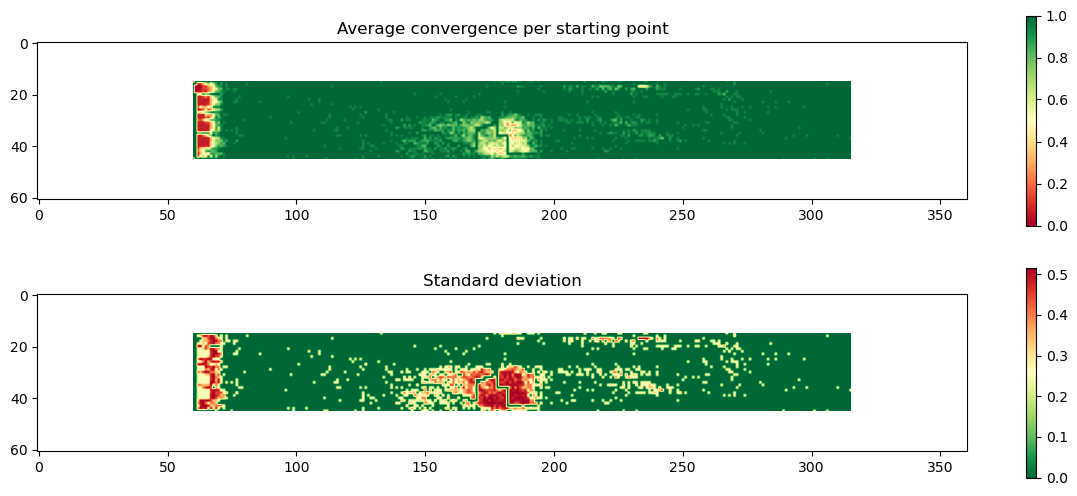

In [9]:
_, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))

ax1.set_title('Average convergence per starting point')
im1 = ax1.imshow(convergence_map, cmap='RdYlGn')
plt.colorbar(im1, ax=ax1)

ax2.set_title('Standard deviation')
im2 = ax2.imshow(convergence_std_map, cmap='RdYlGn_r')
plt.colorbar(im2, ax=ax2)
plt.show()

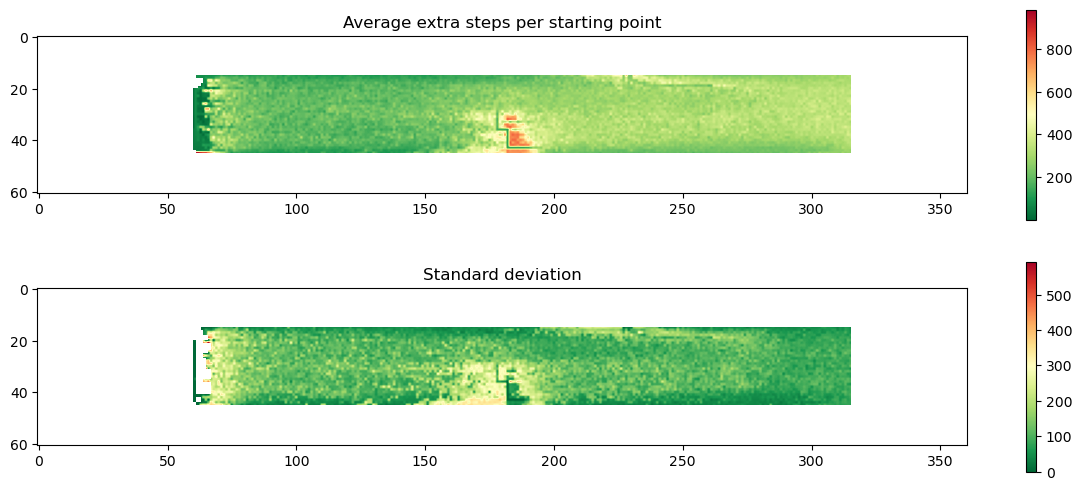

In [10]:
_, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))

ax1.set_title('Average extra steps per starting point')
im1 = ax1.imshow(extra_steps_map, cmap='RdYlGn_r')
plt.colorbar(im1, ax=ax1)

ax2.set_title('Standard deviation')
im2 = ax2.imshow(extra_steps_std_map, cmap='RdYlGn_r')
plt.colorbar(im2, ax=ax2)
plt.show()

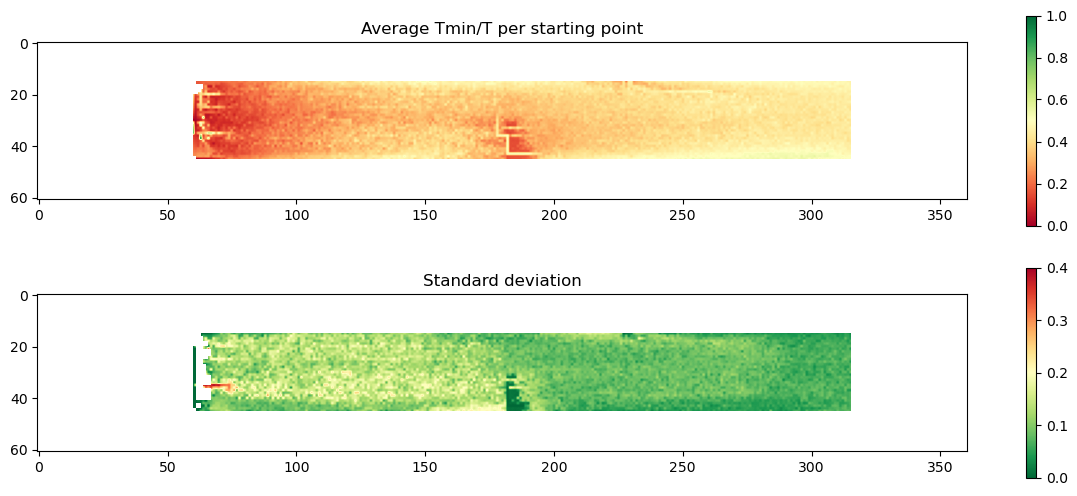

In [11]:
_, (ax1, ax2) = plt.subplots(2,1, figsize=(15,6))

ax1.set_title('Average Tmin/T per starting point')
im1 = ax1.imshow(tmin_over_t_map, cmap='RdYlGn', vmin=0.0, vmax=1.0)
plt.colorbar(im1, ax=ax1)

ax2.set_title('Standard deviation')
im2 = ax2.imshow(tmin_over_t_std_map, cmap='RdYlGn_r')
plt.colorbar(im2, ax=ax2)
plt.show()